Our task is to predict whether a bank currency note is authentic or not based upon four attributes of the note i.e. skewness of the wavelet transformed image, variance of the image, entropy of the image, and curtosis of the image. This is a binary classification problem and we will use SVM algorithm to solve this problem. Use different SVM kernels and find best classification accuracy

          Variance     Skewness     Curtosis      Entropy        Class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000
0    762
1    610
Name: Class, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027FD8B12220>,
      dtype=object)

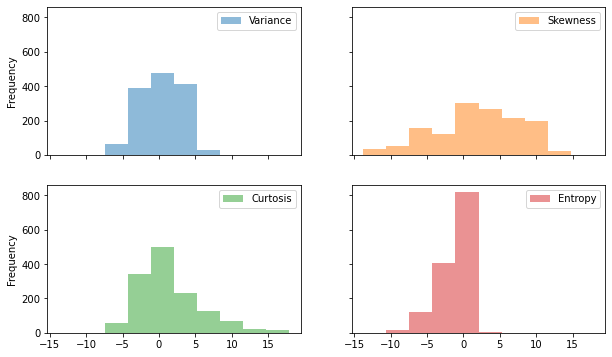

In [150]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

data = pd.read_csv('bill_authentication.csv')
print(data.describe())
print(data['Class'].value_counts())

data.drop(['Class'], axis='columns').plot(kind='hist', figsize=(10,6), alpha=0.5, subplots=True, layout=(2,2), sharey=True)

In [151]:
# Helper function to draw a scatter of samples according to given variables and split by class
def plot_classes(data, x, y):
    plt.scatter(data[data.Class == 0][x],
            data[data.Class == 0][y],
            c='b', marker='x',
            label='Class 0')
    plt.scatter(data[data.Class == 1][x],
            data[data.Class == 1][y],
            c='r', marker='x',
            label='Class 1')
    plt.legend(loc='best')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.tight_layout()


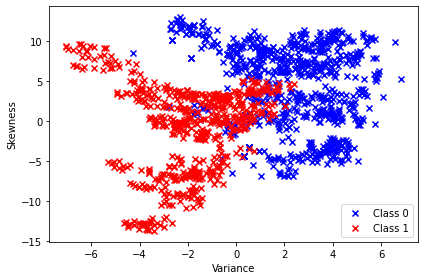

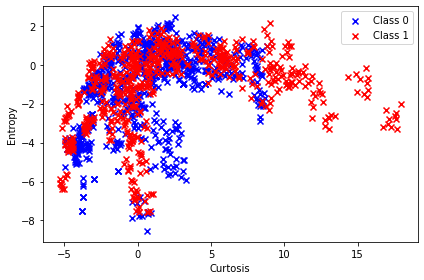

In [152]:
# As we have multiple dimensions we have to select 2 for plotting
plot_classes(data, 'Variance', 'Skewness')
plt.show()
plot_classes(data, 'Curtosis', 'Entropy')
plt.show()

[[155   2]
 [  0 118]]
Accuracy =  0.9927272727272727
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       157
           1       0.98      1.00      0.99       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



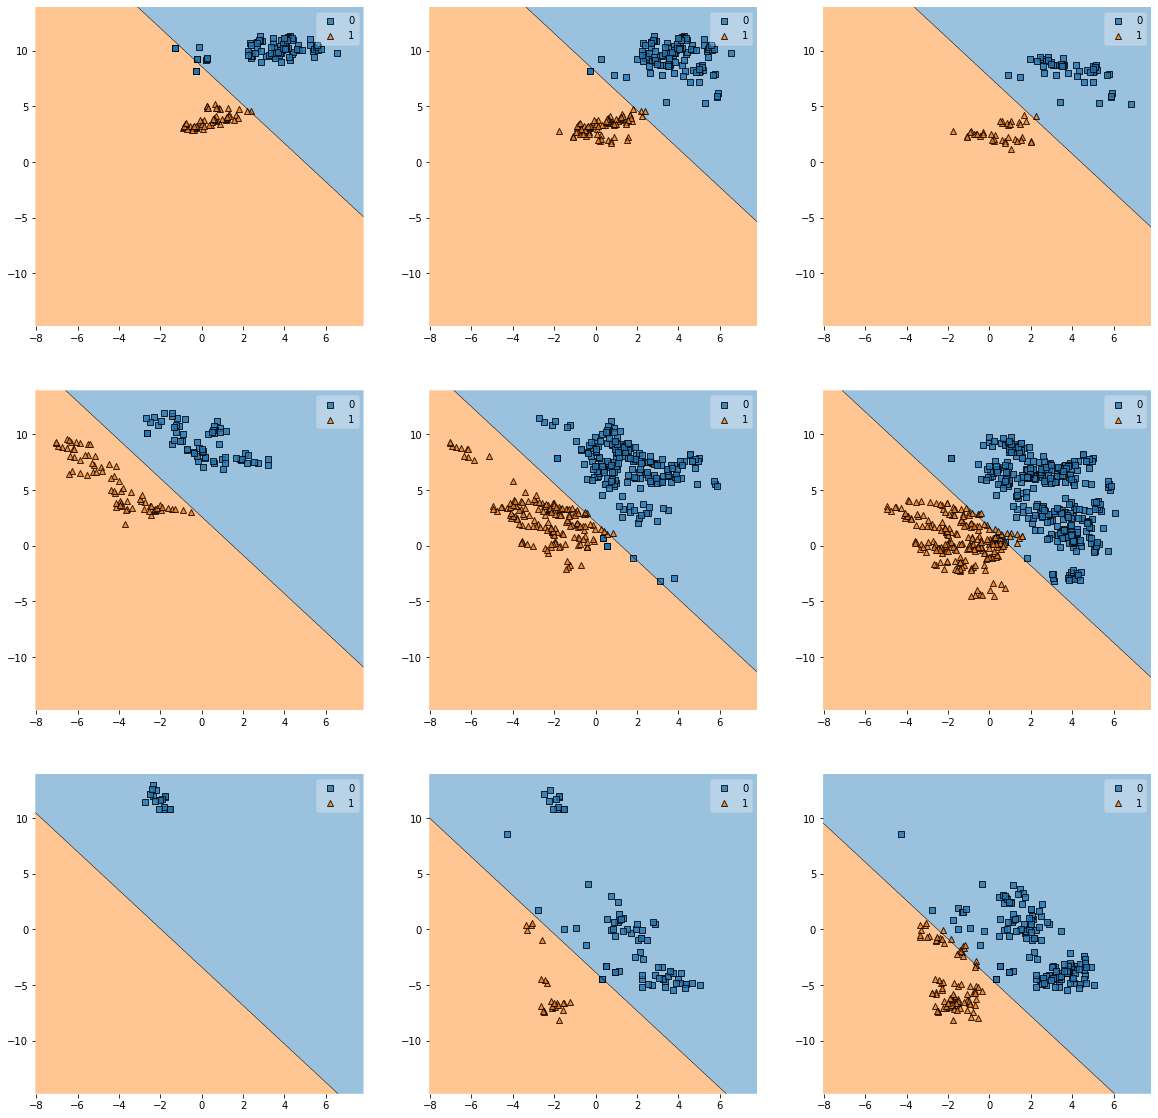

In [154]:
X = data.drop(['Class'], axis='columns')
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Create a SVC classifier using a linear kernel
lsvm = SVC(kernel='linear', C=1, random_state=0)
# Train the classifier
lsvm.fit(X_train, y_train)

# Perform predictions on the test dataset
predictions = lsvm.predict(X_test)
# Create the confusion matrix
print(confusion_matrix(y_test, predictions))
# Find the accuracy of our model
print('Accuracy = ', accuracy_score(y_test, predictions))
print(classification_report(y_test,predictions))

# Decision region for different Entropy and Curtosis values
entropy = [-5, -2.5, 0]
curtosis = [-5, 0, 5]
width = 2.5 # range to draw samples = value +/- width
figure, axes = plt.subplots(3, 3, figsize=(20,20), sharex=True, sharey=True)
for i in range(3):
    for j in range(3):
        plot_decision_regions(X.to_numpy(), y.to_numpy(), clf=lsvm,
                              feature_index=(0,1),
                              filler_feature_values={2: curtosis[i], 3: entropy[j]},
                              filler_feature_ranges={2: width, 3: width}, ax=axes[i][j])


[[157   0]
 [  0 118]]
Accuracy =  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       118

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



D:\Applications\Anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:244: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,
D:\Applications\Anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:244: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,
D:\Applications\Anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:244: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


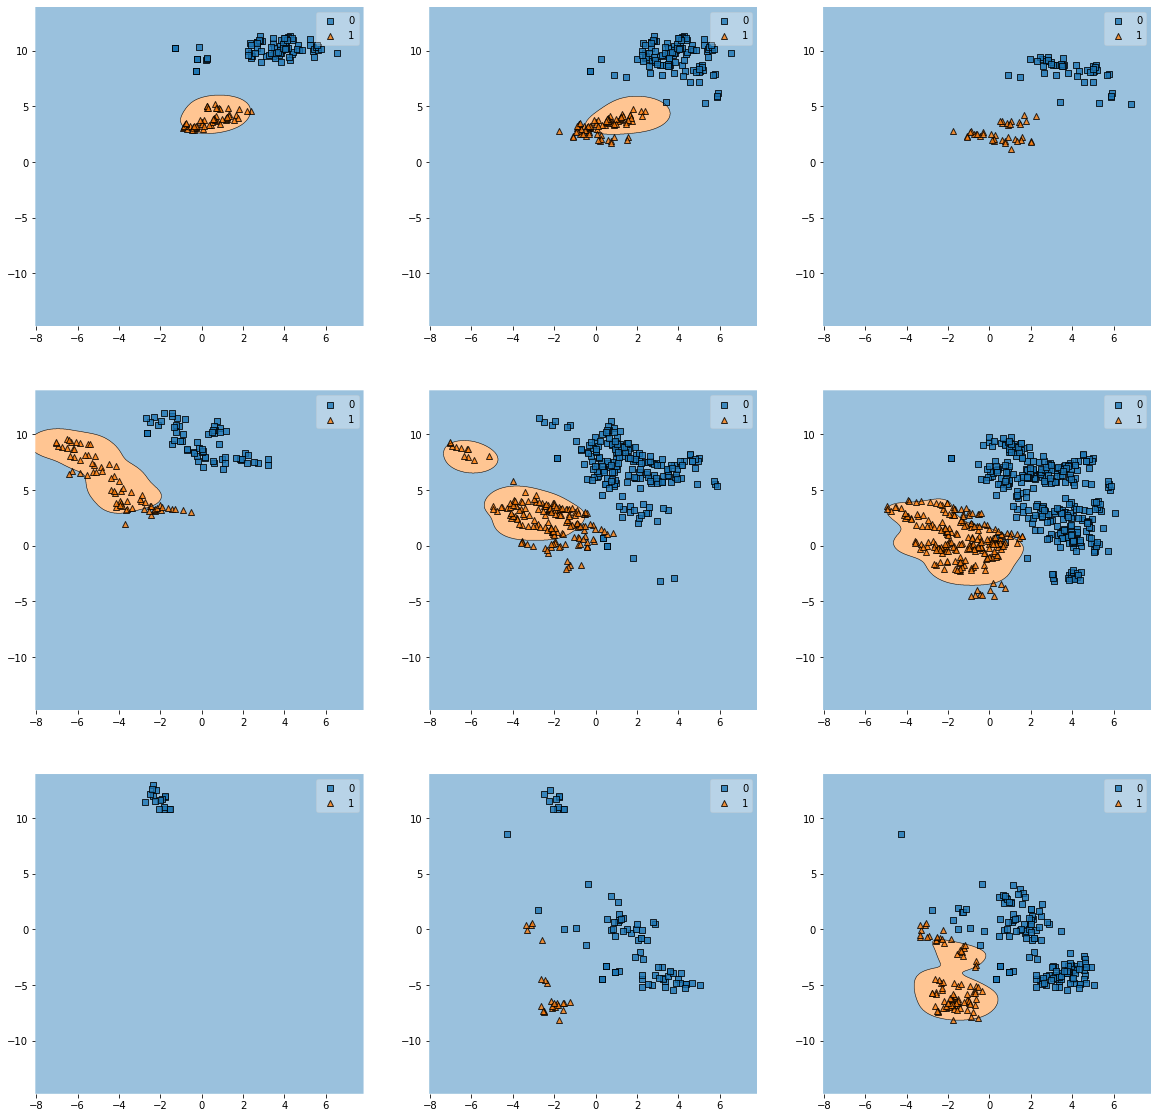

In [156]:
# Create a SVC classifier using an RBF kernel
rsvm = SVC(kernel='rbf', random_state=0, gamma=1, C=1)
# Train the classifier
rsvm.fit(X_train, y_train)

# Perform predictions on the test dataset
predictions = rsvm.predict(X_test)
# Create the confusion matrix
print(confusion_matrix(y_test, predictions))
# Find the accuracy of our model
print('Accuracy = ', accuracy_score(y_test, predictions))
print(classification_report(y_test,predictions))

# Decision regions for different Entropy and Curtosis values
figure, axes = plt.subplots(3, 3, figsize=(20,20), sharex=True, sharey=True)
for i in range(3):
    for j in range(3):
        plot_decision_regions(X.to_numpy(), y.to_numpy(), clf=rsvm,
                              feature_index=(0,1),
                              filler_feature_values={2: curtosis[i], 3: entropy[j]},
                              filler_feature_ranges={2: width, 3: width}, ax=axes[i][j])

As we can see we can find a "perfect" classifier using a RBF kernel setup while the linear setup exhibits some false positive.